Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [9]:
NAME = "Hannah Lange"
COLLABORATORS = ""

---

In [10]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

from tensorflow.python.keras.datasets import cifar10
from tensorflow.python.keras.models import Model, load_model
from tensorflow.python.keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Network analysis 
The aim of this exercise is to familiarise yourself with analysing tools for trained neural networks,
i.e. opening the black box. In Keras you can access the value of the weights using get_weights().
Here we analyse the network we have discussed in the lectures. The pretrained weights are saved in keras_cifar10_trained_model.h5.

* In a frst step, identify examples where the network is not yet performing well, i.e. which
are incorrectly classified.
* In a second step, visualise the activations of the different filters in the convolutional layers. Try to identify the role of some of the hidden filters. It might be useful to consider the activations for a particular class of the dataset.

In [11]:
class CifarData:
    """ Class to prepare the data. Nothing for you to do here. """

    def __init__(self, data_fraction=1 / 10):
        data = cifar10
        (self.x_train, self.y_train), (self.x_test, self.y_test) = data.load_data()

        self.data_fraction = data_fraction
        self.get_subset_of_data(self.data_fraction)

        self.convert_label_to_categorical()

    def convert_label_to_categorical(self):
        self.y_train = to_categorical(self.y_train)
        self.y_test = to_categorical(self.y_test)

    def normalize_images(self):
        self.x_train = self.x_train / 255.0
        self.x_test = self.x_test / 255.0

    def get_subset_of_data(self, data_fraction):
        index = int(len(self.x_train) * data_fraction)
        self.x_train = self.x_train[:index]
        self.y_train = self.y_train[:index]
        index = int(len(self.x_test) * data_fraction)
        self.x_test = self.x_test[:index]
        self.y_test = self.y_test[:index]


In [12]:
class PretrainedModel:
    def __init__(self, data: CifarData, filepath: str):
        self.x_train = data.x_train
        self.x_test = data.x_test
        self.y_train = data.y_train
        self.y_test = data.y_test

        self.filepath = filepath
        self.model = None
        self.import_model()

        self.prediction = None
        self.intercepted_model = None

    def import_model(self):
        """Load the model from self.filepath to store it in self.model. """
        # YOUR CODE HERE
        self.model = load_model(self.filepath)

    def predict_dataset(self):
        self.prediction = np.rint(self.model.predict(self.x_test))

    def find_incorrect_classifications(self, num_samples=5):
        """Write a function that finds the incorrect classifications in the prediction. 
        Store the truth values in the indices list, such that the incorrect classifications are returned. """
        indices = []
        # YOUR CODE HERE
        for i in range(num_samples):
            if (list(self.prediction[i]) != list(self.y_test[i])):
                indices.append(i) 
        return self.x_test[:num_samples][indices], self.y_test[:num_samples][indices], self.prediction[:num_samples][
            indices]

    def find_correct_classifications(self):
        indices = np.all(self.y_test == self.prediction)
        return self.x_test[indices], self.y_test[indices], self.prediction[indices]

    def intercept_model_at_layer(self, layer):
        """Store the model intercepting the loaded model at layer 'layer' in self.intercepted_model.
        Use the Model class from tf.python.keras.models."""
        # YOUR CODE HERE
        self.intercepted_model = Model(inputs = self.model.input, outputs = layer.output)

    def plot_activation_for_intercepted(self, image, num_of_filters):
        """This function plots the activation of the intercepted model for the image 'image'. Nothing for you
        to do here."""
        image = image[np.newaxis, :, :, :]
        prediction = self.intercepted_model.predict(image)

        fig, axes = plt.subplots(int(num_of_filters / 8), 8, figsize=(12, 12))

        #plotting the activations for each layer
        for i in range(num_of_filters):
            axes[i // 8, i % 8].imshow(prediction[0, :, :, i], interpolation='nearest',
                                       cmap=plt.cm.Greys)
            axes[i // 8, i % 8].set_xticks(())
            axes[i // 8, i % 8].set_yticks(())
        plt.show()

    def show_conv_activations(self, image):
        """This function searches for the convolutional layers in the network and plots the activations after 
        each convolutional layer. Nothing for you to do here."""
        for num_of_layer in range(len(self.model.layers)):
            #filtering for the convolutional layers in the model
            layer = self.model.layers[num_of_layer]
            if 'conv' not in layer.name:
                continue

            num_of_filters = layer.output_shape[3]

            print('Layer number {num_of_layer}; Layer name: {name}; Number of filters: {num_of_filters}'.format(
                num_of_layer=num_of_layer, name=layer.name, num_of_filters=num_of_filters))

            #Build model to compute the output of the given layer
            self.intercept_model_at_layer(layer)
            #getting the activation map after using our example image as input
            self.plot_activation_for_intercepted(image, num_of_filters)


In [13]:
# Your code will be autograded here!

In [14]:
# Your code will be autograded here!

In [15]:
# Your code will be autograded here!

### Part 1
Generate the cifar data using the class CifarData from above to a variable `cifar_mnist`.
Create an Instance of the PretrainedModel Class and write it to a variable `pretrained_model`. Make sure you pass the right filepath of the .h5 file.

In [16]:
# YOUR CODE HERE
cifar_mnist = CifarData()
pretrained_model = PretrainedModel(cifar_mnist, "keras_cifar10_trained_model.h5")
pretrained_model.model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)       

In [17]:
# Your code will be autograded here!

Identify examples where the network is not yet performing well, i.e. which are incorrectly classified. 
Use the functions in the PretrainedModel class to find incorrect classifications of `pretrained_model`. 

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


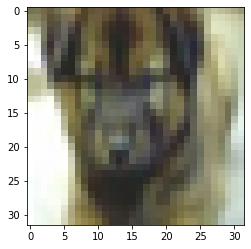

In [18]:
# YOUR CODE HERE
pretrained_model.import_model()
pretrained_model.predict_dataset()
x_test_wrong, y_test_wrong, pred_wrong = pretrained_model.find_incorrect_classifications(100)
i = 15
print(y_test_wrong[i])
print(pred_wrong[i])
plt.imshow(x_test_wrong[i], interpolation='nearest')


In [19]:
# Your code will be autograded here!

The incorrectly classified pictures are mostly easy to identify but for at least one of the 5 pictures selected it is
hard to identify even by hand.

### Part 2
Now visualise the activations of the different filters in the convolutional layers of `pretrained_model`.
Try to identify the role of some of the hidden filters.
It might be useful to consider the activations for a particular class of the dataset.
Save your plot to a variable named `activation_plot`.

Layer number 0; Layer name: conv2d_8; Number of filters: 32


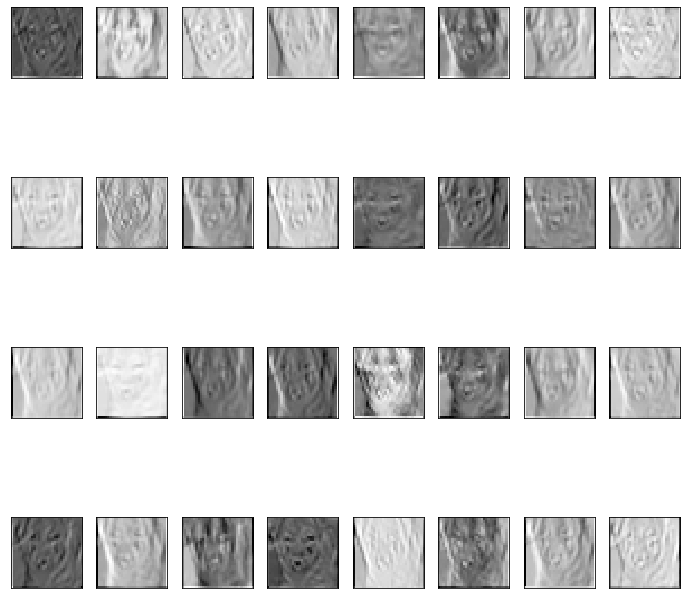

Layer number 2; Layer name: conv2d_9; Number of filters: 32


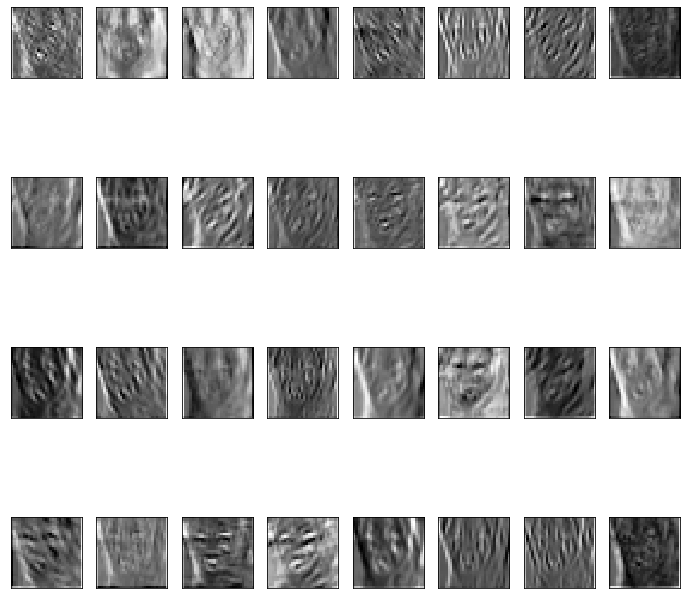

Layer number 6; Layer name: conv2d_10; Number of filters: 64


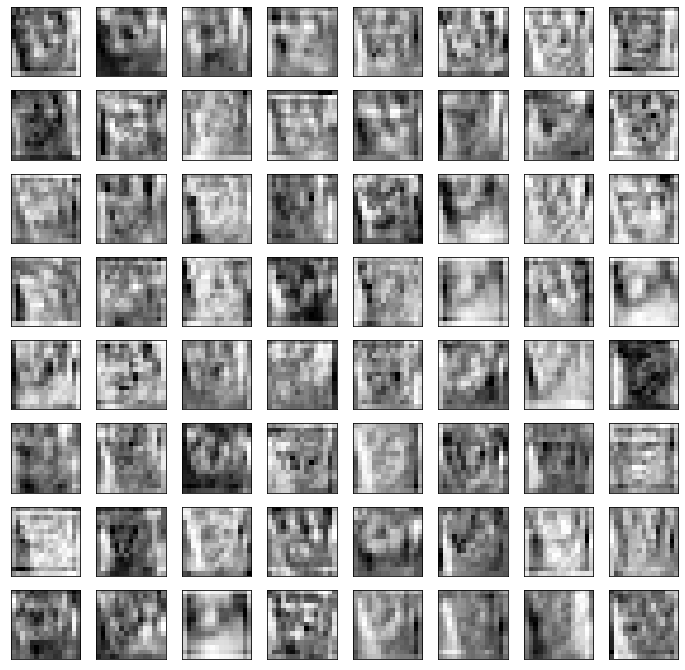

Layer number 8; Layer name: conv2d_11; Number of filters: 64


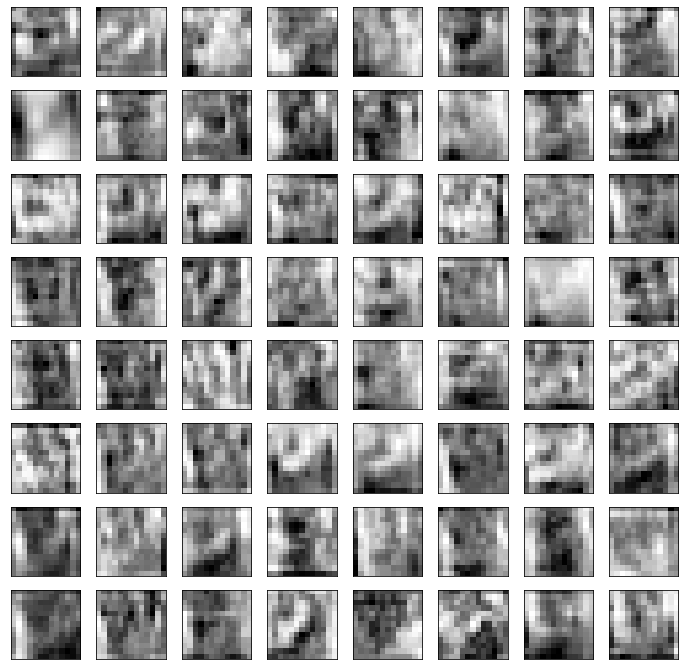

In [20]:
activation_plot = None

# YOUR CODE HERE
pretrained_model.show_conv_activations(x_test_wrong[i])

In [21]:
# Your code will be autograded here!

Comment on the role the different layers have. You can also have a look at other layer types.

YOUR ANSWER HERE

- convolutional layer 0: puts various filters on the image
- convolutional layer 1: varies the focus of the image
- convolutional layer 2 and 3: zooms into the image, output: different parts of the image